# The SXS catalog

The first thing to know about SXS data is just what's available, which we gather together in "the catalog", which contains information about all datasets.  This information includes metadata about the simulations — like mass ratios, spins, etc. — as well as information about files that are available and where to find them.


# The `sxs.Catalog`

The concept of "the catalog" is made concrete in the form of an object available in the `sxs` python module, which encapsulates all the catalog information.  It's easy to load, like this:

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import corner
import qgrid

import sxs

catalog = sxs.load("catalog")

The `catalog` object has five top-level features:

 1. `modified` — most recent time stamp of new data on Zenodo/CaltechDATA
 2. `description` — documents every piece of data found in `catalog.json`; probably not interesting
 3. `records` — details of every version of every record on Zenodo or CaltechDATA, including file info, URLs, etc.
 4. `simulations` — metadata describing each simulation: mass ratios, spins, etc.
 5. `select` — function to find the data files you care about

These are all accessible through the `catalog` object.  For example, to see the latest modification time, do this:

In [2]:
catalog.modified

'2020-09-09T14:00:27.593502'

If you need to know the gory details, you could also print `catalog.description`.

You could also look at the details about what we've uploaded to Zenodo or CaltechDATA, under `catalog.records`.  But be aware that this is an extremely large dictionary; it might kill your browser to look at the whole thing. If you're interested, you could just look at the first record by uncommenting and running the following line:

In [3]:
# catalog.records["https://doi.org/10.5281/zenodo.1210581"]

But none of that is very interesting.  The only really interesting things are `simulations` and `select`.

# Simulations

The `catalog.simulations` object gives you access to all of the metadata from all of the simulations SXS has published.  Specifically, this is a `dict` mapping SXS IDs (e.g., "SXS:BBH:0123") to Metadata objects.  You can access  each of those features just like you did on an individual metadata object in the previous notebook:

In [14]:
catalog.simulations["SXS:BBH:0123"].reference_dimensionless_spin1

[0.266756234962, 0.0203147886466, -0.415103367667]

[One fun point about this is that tab-completion works.  As you type "SXS:BBH", for example, hit tab to get a list of the possibilities.  Then, once you've closed the brackets, type ".ref" and hit tab again to get the possible metadata fields.]

As explained [in the previous notebook](01-metadata.ipynb#Pain-points-with-the-metadata), using these Metadata objects directly can be painful because of various missing values and inhomogeneous data types.  We provide another interface to the data that strikes a compromise between preserving information and making the information usable.  So, as far as possible, we force our metadata fields to have consistent datatypes within each column.

## Simulations dataframe

The widely used `pandas` package is designed for precisely this application: analysing tabular data with heterogeneously typed columns.  It provides very powerful features for all sorts of sorting, selection, and statistical analysis.  So we use `pandas` to help us.  Plus, we get to make this really cool table:

In [17]:
dataframe = catalog.simulations_dataframe

qgrid.show_grid(dataframe, precision=8, show_toolbar=True, grid_options={"forceFitColumns": False})

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

You can sort by a column by clicking on the column header.  You can also filter by value by clicking the <span class="fa fa-filter filter-icon"></span> icon in the header.  Click on the little crossed arrows at the top-right corner of the table below to expand it to fill your browser.

## Doing that and more, programatically

While graphical interfaces are fun, there is more reproducibility and power in programming.

### Slices

We can slice the dataframe in a dizzying number of ways.  But there are two that are simplest and most reliable.  First, and most easily, we can take standard slices, like the first four elements:

In [76]:
dataframe[:4]

,object_types,initial_separation,initial_orbital_frequency,initial_adot,initial_ADM_energy,initial_ADM_linear_momentum,initial_ADM_linear_momentum_mag,initial_ADM_angular_momentum,initial_ADM_angular_momentum_mag,initial_mass1,initial_mass2,initial_mass_ratio,initial_dimensionless_spin1,initial_dimensionless_spin1_mag,initial_dimensionless_spin2,initial_dimensionless_spin2_mag,initial_position1,initial_position2,com_correction_space_translation,com_correction_space_translation_mag,com_correction_boost_velocity,com_correction_boost_velocity_mag,reference_time,reference_separation,reference_orbital_frequency_mag,reference_mass_ratio,reference_chi1_mag,reference_chi2_mag,reference_chi_eff,reference_chi1_perp,reference_chi2_perp,reference_eccentricity,reference_eccentricity_bound,reference_mean_anomaly,reference_mass1,reference_mass2,reference_dimensionless_spin1,reference_dimensionless_spin1_mag,reference_dimensionless_spin2,reference_dimensionless_spin2_mag,reference_orbital_frequency,reference_position1,reference_position2,relaxation_time,common_horizon_time,remnant_mass,remnant_dimensionless_spin,remnant_dimensionless_spin_mag,remnant_velocity,remnant_velocity_mag,eos,initial_data_type,disk_mass,ejecta_mass,url,metadata_path
SXS:BBH:0001,BHBH,18.0,0.012203,-0.000025,0.993736,"[7.5160071e-09, 2.4389069e-09, -5.798632e-10]",7.923059e-09,"[4.27581822e-08, -2.342625073e-07, 1.184715566...",1.184716,0.5,0.5,1.0,"[-6.35700000002e-13, 4.72400000001e-13, 1.0250...",1.025093e-09,"[4.49999999998e-15, -2.8e-15, 1.55938e-11]",1.559380e-11,"[9.000000125802465, -2.86646421e-08, 0.0]","[-8.999999874197535, -2.86646421e-08, 0.0]","[3.66682144e-08, -6.56803161e-08, -2.07905838e...",7.525147e-08,"[3.97328099e-10, 7.31875744e-10, 9.21325957e-13]",8.327740e-10,320.0,17.935604,0.012275,1.000000,1.209348e-07,1.222053e-07,1.215639e-07,9.733309e-10,1.429939e-09,0.000257,0.000257,3.083240,0.50000,0.5,"[7.09752141352e-10, -6.66051760901e-10, 1.2093...",1.209348e-07,"[5.84453420303e-10, 1.30504445113e-09, 1.22196...",1.222053e-07,"[2.82808523611e-13, -8.25159171205e-13, 0.0122...","[-6.46056288098, -6.21953367941, -3.3788610441...","[6.46056317772, 6.21953399104, 2.00589477099e-10]",320.0,9524.085983,0.951609,"[-7.29520687012e-10, 7.40468371215e-10, 0.6864...",0.686462,"[1.45734870604e-09, 7.51603528474e-10, 3.72053...",4.065850e-09,NaN,BBH_CFMS,NaN,NaN,https://doi.org/10.5281/zenodo.1212426,SXS:BBH:0001v1/Lev5/metadata.json
SXS:BBH:0002,BHBH,19.0,0.011292,-0.000021,0.994031,"[1.6810827e-09, 1.4244131e-09, -1.14839759e-08]",1.169345e-08,"[2.7620419806e-06, -2.4287931932e-06, 1.210130...",1.210131,0.5,0.5,1.0,"[5.31932999999e-11, -6.31285000002e-11, -1.178...",1.178367e-08,"[-3.268359e-10, 2.252065e-10, -1.44598159e-08]",1.446526e-08,"[9.50000028134381, 2.0830027e-07, 0.0]","[-9.49999971865619, 2.0830027e-07, 0.0]","[-4.66496816e-08, 2.43885579e-08, -7.46689767e...",5.316718e-08,"[4.76165747e-11, -3.72265623e-10, 1.4640838e-12]",3.753014e-10,310.0,18.954130,0.011339,1.000000,9.484279e-08,9.315963e-08,9.399402e-08,7.181763e-10,1.473155e-09,0.000175,0.000175,2.514884,0.50000,0.5,"[6.50756283834e-10, -3.03798339473e-10, 9.4840...",9.484279e-08,"[1.0426889812e-09, 1.04066536466e-09, 9.314798...",9.315963e-08,"[2.20978373119e-13, -7.93686620079e-13, 0.0113...","[-8.87345009522, -3.32815913214, 1.74403931592...","[8.87345005146, 3.32815888263, 2.94462584419e-10]",310.0,11804.749017,0.951610,"[3.75218798083e-10, 1.32614402018e-09, 0.68644...",0.686448,"[3.59963486031e-09, 7.18141003028e-09, 1.18947...",1.435326e-08,NaN,BBH_CFMS,NaN,NaN,https://doi.org/10.5281/zenodo.1210580,SXS:BBH:0002v1/Lev6/metadata.json
SXS:BBH:0003,BHBH,19.0,0.011284,-0.000019,0.994277,"[2.599703e-09, -4.1239227e-09, 6.03918869017e-05]",6.039189e-05,"[0.1251774015530911, -0.0006755685628109, 1.21...",1.216661,0.5,0.5,1.0,"[0.499999999848, -6.53288000001e-11, -7.536800...",5.000000e-01,"[5.53092599998e-10, 3.55121e-11, -1.2848197e-08]",1.286015e-08,"[9.492634967060557, -0.0023408782825215, 

Or we can select columns to extract:

In [77]:
dataframe[["object_types", "initial_adot"]]

,object_types,initial_adot
SXS:BBH:0001,BHBH,-0.000025
SXS:BBH:0002,BHBH,-0.000021
SXS:BBH:0003,BHBH,-0.000019
SXS:BBH:0004,BHBH,-0.000028
SXS:BBH:0005,BHBH,-0.000016
...,...,...
SXS:BHNS:0003,BHNS,0.000000
SXS:BHNS:0004,BHNS,-0.000022
SXS:BHNS:0005,BHNS,-0.000025
SXS:BHNS:0006,BHNS,-0.000012


To combine them, we just do them in sequence:

In [78]:
dataframe[:4][["object_types", "initial_adot"]]

,object_types,initial_adot
SXS:BBH:0001,BHBH,-0.000025
SXS:BBH:0002,BHBH,-0.000021
SXS:BBH:0003,BHBH,-0.000019
SXS:BBH:0004,BHBH,-0.000028


### Tests

The concept of tests is fairly simply.  For example, we can test whether or not the `object_types` field is equal to `BHNS`:

In [39]:
dataframe["object_types"] == "BHNS"

SXS:BBH:0001     False
SXS:BBH:0002     False
SXS:BBH:0003     False
SXS:BBH:0004     False
SXS:BBH:0005     False
                 ...  
SXS:BHNS:0003     True
SXS:BHNS:0004     True
SXS:BHNS:0005     True
SXS:BHNS:0006     True
SXS:BHNS:0007     True
Name: object_types, Length: 2028, dtype: bool

We get a pandas Series object, where most of the results say `False`, but the last few say `True` — because they are the ones for which the `object_types` field is `BHNS`.  Now, we can use this Series just like we would in numpy to extract the items where this test gives us `True`:

In [40]:
dataframe[dataframe["object_types"] == "BHNS"]

,object_types,initial_separation,initial_orbital_frequency,initial_adot,initial_ADM_energy,initial_ADM_linear_momentum,initial_ADM_linear_momentum_mag,initial_ADM_angular_momentum,initial_ADM_angular_momentum_mag,initial_mass1,initial_mass2,initial_mass_ratio,initial_dimensionless_spin1,initial_dimensionless_spin1_mag,initial_dimensionless_spin2,initial_dimensionless_spin2_mag,initial_position1,initial_position2,com_correction_space_translation,com_correction_space_translation_mag,com_correction_boost_velocity,com_correction_boost_velocity_mag,reference_time,reference_separation,reference_orbital_frequency_mag,reference_mass_ratio,reference_chi1_mag,reference_chi2_mag,reference_chi_eff,reference_chi1_perp,reference_chi2_perp,reference_eccentricity,reference_eccentricity_bound,reference_mean_anomaly,reference_mass1,reference_mass2,reference_dimensionless_spin1,reference_dimensionless_spin1_mag,reference_dimensionless_spin2,reference_dimensionless_spin2_mag,reference_orbital_frequency,reference_position1,reference_position2,relaxation_time,common_horizon_time,remnant_mass,remnant_dimensionless_spin,remnant_dimensionless_spin_mag,remnant_velocity,remnant_velocity_mag,eos,initial_data_type,disk_mass,ejecta_mass,url,metadata_path
SXS:BHNS:0001,BHNS,106.68,0.002537,0.000001,9.754357,"[-2.03885932771e-05, 9.797238987913e-05, -5.05...",0.000100,"[1.71682e-10, -4.67012e-09, 46.6686927]",46.668693,8.40000,1.40,6.000000,"[-2.17854188067e-11, -1.15479769912e-11, 7.880...",7.880817e-08,"[0.0, 0.0, 0.0]",0.000000,"[9.000000125802465, -2.86646421e-08, 0.0]","[-8.999999874197535, -2.86646421e-08, 0.0]","[nan, nan, nan]",NaN,"[nan, nan, nan]",NaN,300.0,106.550628,0.002626,6.000024,0.000008,0.0,0.000007,1.374112e-08,0.0,NaN,0.00130,NaN,8.400034,1.4,"[-1.11099403292e-08, -8.08325378817e-09, 8.052...",0.000008,"[0.0, 0.0, 0.0]",0.0,"[3.6309913469387756e-10, 4.830074795918366e-10...","[10.836254110109586, 11.027064220491827, -2.89...","[-66.42713680329717, -62.34462441812844, 0.0]",300.0,NaN,9.656891,"[-5.33167104889e-06, -1.0448639427e-06, 0.3729...",0.372924,"[0.000354153, 0.000387793, 1.87607e-06]",0.000525,"polytrope(kappa=92.12,gamma=2)",BHNS,0.000000,0.0,https://doi.org/10.5281/zenodo.1215690,SXS:BHNS:0001v1/Lev3/metadata.json
SXS:BHNS:0002,BHNS,56.00,0.004456,-0.000015,4.169582,"[-1.9413609314e-06, -8.496132757e-07, 1.095574...",0.000002,"[0.0, 0.0, 16.60638426824671]",16.606384,2.80000,1.40,2.000000,NaN,NaN,"[0.0, 0.0, 0.0]",0.000000,"[18.6689609512373, 0.4152238738006775, -1.7047...","[-37.330292064606674, -0.00015284676006403007,...","[nan, nan, nan]",NaN,"[nan, nan, nan]",NaN,400.0,55.847036,0.004492,1.999998,0.000004,0.0,0.000002,1.662024e-09,0.0,NaN,0.00050,NaN,2.799997,1.4,"[7.87020885546909e-10, -1.4638723267461896e-09...",0.000004,"[0.0, 0.0, 0.0]",0.0,"[0.0, 0.0, 0.004492160495633515]","[-3.738798327648123, 18.348656580918536, 1.020...","[7.357408482389543, -36.384930828761185, 0.0]",400.0,NaN,4.061725,NaN,NaN,"[0.000742476, -3.7436e-05, 9.89369e-08]",0.000743,"polytrope(kappa=101.45,gamma=2)",BHNS,0.049606,NaN,https://doi.org/10.5281/zenodo.1215694,SXS:BHNS:0002v1/Lev3/metadata.json
SXS:BHNS:0003,BHNS,51.43,0.005595,0.000000,5.400000,"[0, 0, 0]",0.000000,"[0.0, 0.0, 16.60638426824671]",16.606384,4.05001,1.35,3.000007,NaN,NaN,"[0.0, 0.0, 0.0]",0.000000,"[12.9917, 0.488373, 0.0]","[-38.4325, 0.0, 0.0]","[nan, nan, nan]",NaN,"[nan, nan, nan]",NaN,700.0,38.379576,0.005506,NaN,0.000007,NaN,NaN,NaN,NaN,NaN,0.00050,NaN,4.049978,NaN,"[-6.571999377571653e-08, -1.5635774158256187e-...",0.000007,NaN,NaN,"[9.43009176e-09, 4.96388988e-09, 0.0055057277]","[10.166677031820022, -8.119008184499606, -3.79...","[29.29999506897757, 25.1512188782879, -0.00013...",700.0,NaN,NaN,NaN,NaN,not measured,NaN,"PiecewisePolytrope(Gammas=1.3569,3.00; Transit...",BHNS,NaN,NaN,https://doi.org/10.5281/zenodo.2318272,SXS:BHNS:0003v1/Lev2/metadata.json
SXS:BHNS:0004,BHNS,39.20,0.006233,-0.000022,2.778112,"[-1.2457454507e-06, 5.44427247228e-06, -6.2716...",0.000006,

(Here, we're just looking at the data, so we don't bother with the fancy grid we used above.)

Next, we might want to combine tests.  This is done by putting each test inside parentheses, and combinging results with `&`:

In [44]:
dataframe[(dataframe["object_types"] == "BHNS") & (dataframe["initial_separation"] < 52)]

,object_types,initial_separation,initial_orbital_frequency,initial_adot,initial_ADM_energy,initial_ADM_linear_momentum,initial_ADM_linear_momentum_mag,initial_ADM_angular_momentum,initial_ADM_angular_momentum_mag,initial_mass1,initial_mass2,initial_mass_ratio,initial_dimensionless_spin1,initial_dimensionless_spin1_mag,initial_dimensionless_spin2,initial_dimensionless_spin2_mag,initial_position1,initial_position2,com_correction_space_translation,com_correction_space_translation_mag,com_correction_boost_velocity,com_correction_boost_velocity_mag,reference_time,reference_separation,reference_orbital_frequency_mag,reference_mass_ratio,reference_chi1_mag,reference_chi2_mag,reference_chi_eff,reference_chi1_perp,reference_chi2_perp,reference_eccentricity,reference_eccentricity_bound,reference_mean_anomaly,reference_mass1,reference_mass2,reference_dimensionless_spin1,reference_dimensionless_spin1_mag,reference_dimensionless_spin2,reference_dimensionless_spin2_mag,reference_orbital_frequency,reference_position1,reference_position2,relaxation_time,common_horizon_time,remnant_mass,remnant_dimensionless_spin,remnant_dimensionless_spin_mag,remnant_velocity,remnant_velocity_mag,eos,initial_data_type,disk_mass,ejecta_mass,url,metadata_path
SXS:BHNS:0003,BHNS,51.43,0.005595,0.000000,5.400000,"[0, 0, 0]",0.000000,"[0.0, 0.0, 16.60638426824671]",16.606384,4.05001,1.35,3.000007,NaN,NaN,"[0.0, 0.0, 0.0]",0.000000,"[12.9917, 0.488373, 0.0]","[-38.4325, 0.0, 0.0]","[nan, nan, nan]",NaN,"[nan, nan, nan]",NaN,700.0,38.379576,0.005506,NaN,0.000007,NaN,NaN,NaN,NaN,NaN,0.00050,NaN,4.049978,NaN,"[-6.571999377571653e-08, -1.5635774158256187e-...",0.000007,NaN,NaN,"[9.43009176e-09, 4.96388988e-09, 0.0055057277]","[10.166677031820022, -8.119008184499606, -3.79...","[29.29999506897757, 25.1512188782879, -0.00013...",700.0,NaN,NaN,NaN,NaN,not measured,NaN,"PiecewisePolytrope(Gammas=1.3569,3.00; Transit...",BHNS,NaN,NaN,https://doi.org/10.5281/zenodo.2318272,SXS:BHNS:0003v1/Lev2/metadata.json
SXS:BHNS:0004,BHNS,39.20,0.006233,-0.000022,2.778112,"[-1.2457454507e-06, 5.44427247228e-06, -6.2716...",0.000006,"[0.0, 0.0, 8.447059816549256]",8.447060,1.40000,1.40,1.000000,"[-2.07334e-11, -2.16445e-12, 8.68429e-08]",8.684290e-08,"[0, 0, 0]",0.000000,"[19.5956, 0.329292, 0.0]","[-19.6, 0.0, 0.0]","[nan, nan, nan]",NaN,"[nan, nan, nan]",NaN,500.0,38.886813,0.006331,NaN,0.000003,NaN,NaN,NaN,NaN,NaN,0.00006,4.00,1.400043,NaN,"[2.85230659969595e-09, 9.85724764076718e-10, 3...",0.000003,NaN,NaN,0.00633089,"[-19.468691760557107, 0.283199769150258, 8.922...","[19.414510547770725, -0.24672956400668786, 0.0]",500.0,NaN,NaN,NaN,NaN,NaN,NaN,"polytrope(kappa=101.4496,gamma=2)",BHNS,NaN,NaN,https://doi.org/10.5281/zenodo.2317398,SXS:BHNS:0004v1/Lev2/metadata.json
SXS:BHNS:0005,BHNS,39.20,0.006235,-0.000025,2.780039,"[2.981054730059816e-06, -1.22406716840395e-06,...",0.000003,"[0.0, 0.0, 8.111755992167552]",8.111756,1.40000,1.40,1.000000,"[2.83152e-16, -1.34965e-16, 2.6712e-08]",2.671200e-08,"[-2.253989796e-14, -1.592091837e-15, -0.200282...",0.200282,"[19.6352, 0.322664, 0.0]","[-19.6, 0.0, 0.0]","[nan, nan, nan]",NaN,"[nan, nan, nan]",NaN,481.5,38.928880,0.006324,NaN,0.000003,NaN,NaN,NaN,NaN,0.0005,0.00050,1.69,1.400020,NaN,"[-9.09178e-08, 2.21749e-09, 3.14641e-06]",0.000003,NaN,NaN,0.00632433,"[-19.23800637141029, 2.6564019739226903, -5.44...","[19.353179644594054, -2.460050720036044, -0.00...",481.5,NaN,NaN,NaN,NaN,NaN,NaN,"polytrope(kappa=101.4496,gamma=2)",BHNS,NaN,NaN,https://doi.org/10.5281/zenodo.2317404,SXS:BHNS:0005v1/Lev2/metadata.json


Here, the combined test is only `True` if both tests to return `True` — the `&` operator is the boolean AND.  We also have OR with `|` and XOR with `^`, as well as negation with `~` — though this can usually be achieved by changing the test.

Before we do anything else, it's convenient to use what we've just learned to separate out the different types of systems:

In [56]:
BHBH = dataframe[dataframe["object_types"] == "BHBH"]
BHNS = dataframe[dataframe["object_types"] == "BHNS"]
NSNS = dataframe[dataframe["object_types"] == "NSNS"]

### Sorting

As with the fancy graphical table above, we can perform a standard sort with respect to any key:

In [58]:
BHBH.sort_values("initial_separation")

,object_types,initial_separation,initial_orbital_frequency,initial_adot,initial_ADM_energy,initial_ADM_linear_momentum,initial_ADM_linear_momentum_mag,initial_ADM_angular_momentum,initial_ADM_angular_momentum_mag,initial_mass1,initial_mass2,initial_mass_ratio,initial_dimensionless_spin1,initial_dimensionless_spin1_mag,initial_dimensionless_spin2,initial_dimensionless_spin2_mag,initial_position1,initial_position2,com_correction_space_translation,com_correction_space_translation_mag,com_correction_boost_velocity,com_correction_boost_velocity_mag,reference_time,reference_separation,reference_orbital_frequency_mag,reference_mass_ratio,reference_chi1_mag,reference_chi2_mag,reference_chi_eff,reference_chi1_perp,reference_chi2_perp,reference_eccentricity,reference_eccentricity_bound,reference_mean_anomaly,reference_mass1,reference_mass2,reference_dimensionless_spin1,reference_dimensionless_spin1_mag,reference_dimensionless_spin2,reference_dimensionless_spin2_mag,reference_orbital_frequency,reference_position1,reference_position2,relaxation_time,common_horizon_time,remnant_mass,remnant_dimensionless_spin,remnant_dimensionless_spin_mag,remnant_velocity,remnant_velocity_mag,eos,initial_data_type,disk_mass,ejecta_mass,url,metadata_path
SXS:BBH:1145,BHBH,8.768433,0.033400,0.000528,0.988193,"[4.0159705e-09, -2.8874734e-09, 2.20182446e-08]",2.256698e-08,"[-5.79788e-11, -4.11334e-11, 0.8979940168937853]",0.897994,0.555556,0.444444,1.250000,"[-7.50680000001e-12, -9.3824e-12, -1.732217437...",1.732217e-07,"[-2.169776e-10, 1.396444e-10, -5.83289100511e-06]",5.832891e-06,"[3.896928392737078, 0.0126460374892269, 0.0]","[-4.871504224452922, 0.0126460374892269, 0.0]","[0.00619385818, -0.00288866058, -1.50588977e-08]",0.006834,"[-3.38372189e-05, 2.83084189e-05, -7.54381904e...",0.000044,160.0,7.876243,0.046631,1.249993,0.000027,0.000007,-0.000018,1.089447e-09,1.791346e-10,NaN,0.200000,5.935005,0.555556,0.444447,"[6.00896191261e-10, -9.08678234281e-10, -2.712...",0.000027,"[1.77529191253e-10, 2.38955982637e-11, -6.8504...",0.000007,"[4.26019546148e-11, -8.83580186789e-11, 0.0466...","[3.47154229955, -0.410654214993, -2.0785530577...","[-4.3516664457, 0.501819770249, -1.19092828476...",160.0,409.274703,0.952505,"[2.69641681936e-09, -2.71527224746e-09, 0.6798...",0.679879,"[-6.53052967664e-05, 0.000188526860992, 6.3951...",0.000200,NaN,BBH_SKS,NaN,NaN,https://doi.org/10.5281/zenodo.1236796,SXS:BBH:1145v1/Lev3/metadata.json
SXS:BBH:0059,BHBH,9.500000,0.030132,-0.000199,0.994318,"[2.6420633e-09, 1.1066897e-09, 1.3278198614e-06]",1.327823e-06,"[0.1667243799731394, -0.0991158740592164, 0.42...",0.469100,0.833333,0.166667,5.000000,"[0.240000000103, -0.14800000005, -0.158000000045]",3.232151e-01,"[6.26919299999e-10, 3.71475000002e-10, 2.39244...",2.393554e-08,"[1.577571745885004, 0.0232626259450057, 0.0]","[-7.922428254114996, 0.0232626259450057, 0.0]","[-0.01777636, -0.00177621, -0.00501676]",0.018556,"[-5.41804109e-06, 1.37600323e-05, 6.14799612e-06]",0.000016,190.0,10.044557,0.030891,5.000300,0.323205,0.000026,-0.133626,2.806207e-01,9.260503e-06,0.005176,0.005176,3.810784,0.833402,0.166670,"[0.265321123923, -0.0963302558354, -0.15743783...",0.323205,"[5.72038421045e-06, -8.01721814889e-06, 2.4361...",0.000026,"[-0.00106396944943, -0.00187236773733, 0.03081...","[1.47400168055, -0.737426708369, 0.00890792732...","[-7.59615131593, 3.57799413788, -0.0420497215206]",190.0,1042.852329,0.983631,"[0.155418128415, -0.0512385089505, 0.337978967...",0.375513,"[-0.000694495031124, 3.83677686171e-05, -0.000...",0.000842,NaN,BBH_CFMS,NaN,NaN,https://doi.org/10.5281/zenodo.1212816,SXS:BBH:0059v1/Lev3/metadata.json
SXS:BBH:0057,BHBH,9.500000,0.030132,-0.000199,0.994590,"[-1.0452306e-09, -1.5100829e-09, -6.4756965853...",6.475697e-05,"[0.2382728616035303, -0.1799939345577782, 0.39...",0.494012,0.833333,0.166667,5.000000,"[0.342999999979, -0.269, -0.207999999986]",4.829845e-01,"[-1.26148579e-08, -3.4435085e-09, -3.630005739...",3.858350e-08,"[1.5812894003664153, 0.0272449

But unlike the fancy graphical table above, we can use a function that serves as the sort key.  (This sort of key function is also available in the standard python library's `sorted` function.)  Here, we'll sort by the absolute value of the difference between `initial_separation` and 20.0.

In [60]:
sorting_field = "initial_separation"
desired_value = 20.0

BHBH.sort_values(sorting_field, key=lambda s: abs(s-desired_value))

,object_types,initial_separation,initial_orbital_frequency,initial_adot,initial_ADM_energy,initial_ADM_linear_momentum,initial_ADM_linear_momentum_mag,initial_ADM_angular_momentum,initial_ADM_angular_momentum_mag,initial_mass1,initial_mass2,initial_mass_ratio,initial_dimensionless_spin1,initial_dimensionless_spin1_mag,initial_dimensionless_spin2,initial_dimensionless_spin2_mag,initial_position1,initial_position2,com_correction_space_translation,com_correction_space_translation_mag,com_correction_boost_velocity,com_correction_boost_velocity_mag,reference_time,reference_separation,reference_orbital_frequency_mag,reference_mass_ratio,reference_chi1_mag,reference_chi2_mag,reference_chi_eff,reference_chi1_perp,reference_chi2_perp,reference_eccentricity,reference_eccentricity_bound,reference_mean_anomaly,reference_mass1,reference_mass2,reference_dimensionless_spin1,reference_dimensionless_spin1_mag,reference_dimensionless_spin2,reference_dimensionless_spin2_mag,reference_orbital_frequency,reference_position1,reference_position2,relaxation_time,common_horizon_time,remnant_mass,remnant_dimensionless_spin,remnant_dimensionless_spin_mag,remnant_velocity,remnant_velocity_mag,eos,initial_data_type,disk_mass,ejecta_mass,url,metadata_path
SXS:BBH:1130,BHBH,20.000000,0.010526,0.000001,0.994279,"[-1.240433e-10, 1.000485e-10, -0.0002327491542...",2.327492e-04,"[8.52611666819e-05, 0.1452893471026843, 1.2337...",1.242241,0.500000,0.500000,1.000000,"[-2.106e-13, 0.600000000018, -9.90470000002e-12]",0.600000,"[-8.26475999999e-11, 1.5241999e-09, -1.6396369...",1.646727e-08,"[10.013099181750198, -0.0079228234220203, 0.0]","[-9.986900818249802, -0.0079228234220203, 0.0]","[0.01191897, -0.00792402, 0.03334674]",0.036289,"[3.67232162e-07, -1.975941e-07, -0.000243718427]",0.000244,160.0,20.444425,0.010550,1.000004,0.599993,1.720622e-07,-0.000510,5.999922e-01,1.560264e-08,NaN,0.001000,1.494857,0.500002,0.500000,"[-0.0399110708345, 0.598661549393, 0.001759748...",0.599993,"[-1.00561158666e-08, -1.24094943162e-08, -1.71...",1.720622e-07,"[9.73172027416e-05, -4.25088988506e-05, 0.0105...","[-1.14375661217, 10.1510608637, 0.0284415652917]","[1.16785947014, -10.1619965933, -0.0747348506749]",160.0,14297.431010,0.951154,"[0.00188406749598, 0.0695155398536, 0.69620682...",0.699671,"[-0.00013471699751, 5.06810812572e-05, 0.00027...",0.000314,NaN,BBH_SKS,NaN,NaN,https://doi.org/10.5281/zenodo.1236770,SXS:BBH:1130v1/Lev3/metadata.json
SXS:BBH:0623,BHBH,20.000000,0.009837,0.000055,0.994419,"[-1.2597544e-09, 2.584556e-10, -3.42284249539e...",3.422842e-05,"[0.4507311241093057, -0.0400147208043062, 1.23...",1.311154,0.526316,0.473684,1.111111,"[0.893068998232, 9.06700000002e-12, 0.11148299...",0.900000,"[0.891435002824, 4.15403e-11, -0.123870000355]",9.000001e-01,"[9.462485973151653, -0.0398791824195513, 0.0]","[-10.537514026848347, -0.0398791824195513, 0.0]","[-0.00578301, -0.04388033, -0.0025778]",0.044335,"[-3.51416622e-09, 3.99166483e-07, -3.42549591e...",0.000034,230.0,20.443606,0.010552,1.111081,0.899786,8.997236e-01,0.005742,8.917771e-01,8.915548e-01,NaN,0.000110,6.134315,0.526376,0.473751,"[0.886419448148, 0.101212137993, 0.11675098017]",0.899786,"[0.884110908147, 0.111928339276, -0.123784132485]",8.997236e-01,"[0.000113714938336, -0.000655676072257, 0.0105...","[-7.26517737746, 6.33776135391, 0.465343926494]","[8.07268781612, -7.14115932691, -0.539453334983]",230.0,14513.641429,0.944936,"[0.287315333817, -0.0490837088878, 0.739541265...",0.794909,"[-0.00013463801546, 8.320132769e-05, -0.000719...",0.000737,NaN,BBH_SKS,NaN,NaN,https://doi.org/10.5281/zenodo.1233603,SXS:BBH:0623v1/Lev4/metadata.json
SXS:BBH:1131,BHBH,20.000000,0.010403,0.000003,0.994285,"[1.47849e-11, -1.80773e-11, 0.0005509351422452]",5.509351e-04,"[0.1509150594264362, -0.0062555203815311, 1.23...",1.242480,0.500000,0.500000,1.000000,"[0.60000000001, 4.01799999998e-13, 9.431000000...",0.600000,"[-8.83269780001e-09, 1.3265835e-09, -3.8524120...",3.954598e-08,"[9.898705008402493, -0.010416650565

So, if we want the 8 systems with initial separations closest to 20, we can just take them:

In [61]:
sorting_field = "initial_separation"
desired_value = 20.0
N = 8

BHBH.sort_values(sorting_field, key=lambda s: abs(s-desired_value))[:N]

,object_types,initial_separation,initial_orbital_frequency,initial_adot,initial_ADM_energy,initial_ADM_linear_momentum,initial_ADM_linear_momentum_mag,initial_ADM_angular_momentum,initial_ADM_angular_momentum_mag,initial_mass1,initial_mass2,initial_mass_ratio,initial_dimensionless_spin1,initial_dimensionless_spin1_mag,initial_dimensionless_spin2,initial_dimensionless_spin2_mag,initial_position1,initial_position2,com_correction_space_translation,com_correction_space_translation_mag,com_correction_boost_velocity,com_correction_boost_velocity_mag,reference_time,reference_separation,reference_orbital_frequency_mag,reference_mass_ratio,reference_chi1_mag,reference_chi2_mag,reference_chi_eff,reference_chi1_perp,reference_chi2_perp,reference_eccentricity,reference_eccentricity_bound,reference_mean_anomaly,reference_mass1,reference_mass2,reference_dimensionless_spin1,reference_dimensionless_spin1_mag,reference_dimensionless_spin2,reference_dimensionless_spin2_mag,reference_orbital_frequency,reference_position1,reference_position2,relaxation_time,common_horizon_time,remnant_mass,remnant_dimensionless_spin,remnant_dimensionless_spin_mag,remnant_velocity,remnant_velocity_mag,eos,initial_data_type,disk_mass,ejecta_mass,url,metadata_path
SXS:BBH:1130,BHBH,20.000000,0.010526,0.000001,0.994279,"[-1.240433e-10, 1.000485e-10, -0.0002327491542...",2.327492e-04,"[8.52611666819e-05, 0.1452893471026843, 1.2337...",1.242241,0.500000,0.500000,1.000000,"[-2.106e-13, 0.600000000018, -9.90470000002e-12]",6.000000e-01,"[-8.26475999999e-11, 1.5241999e-09, -1.6396369...",1.646727e-08,"[10.013099181750198, -0.0079228234220203, 0.0]","[-9.986900818249802, -0.0079228234220203, 0.0]","[0.01191897, -0.00792402, 0.03334674]",0.036289,"[3.67232162e-07, -1.975941e-07, -0.000243718427]",0.000244,160.0,20.444425,0.010550,1.000004,0.599993,1.720622e-07,-0.000510,5.999922e-01,1.560264e-08,NaN,0.001000,1.494857,0.500002,0.500000,"[-0.0399110708345, 0.598661549393, 0.001759748...",0.599993,"[-1.00561158666e-08, -1.24094943162e-08, -1.71...",1.720622e-07,"[9.73172027416e-05, -4.25088988506e-05, 0.0105...","[-1.14375661217, 10.1510608637, 0.0284415652917]","[1.16785947014, -10.1619965933, -0.0747348506749]",160.0,14297.431010,0.951154,"[0.00188406749598, 0.0695155398536, 0.69620682...",0.699671,"[-0.00013471699751, 5.06810812572e-05, 0.00027...",0.000314,NaN,BBH_SKS,NaN,NaN,https://doi.org/10.5281/zenodo.1236770,SXS:BBH:1130v1/Lev3/metadata.json
SXS:BBH:0623,BHBH,20.000000,0.009837,0.000055,0.994419,"[-1.2597544e-09, 2.584556e-10, -3.42284249539e...",3.422842e-05,"[0.4507311241093057, -0.0400147208043062, 1.23...",1.311154,0.526316,0.473684,1.111111,"[0.893068998232, 9.06700000002e-12, 0.11148299...",9.000004e-01,"[0.891435002824, 4.15403e-11, -0.123870000355]",9.000001e-01,"[9.462485973151653, -0.0398791824195513, 0.0]","[-10.537514026848347, -0.0398791824195513, 0.0]","[-0.00578301, -0.04388033, -0.0025778]",0.044335,"[-3.51416622e-09, 3.99166483e-07, -3.42549591e...",0.000034,230.0,20.443606,0.010552,1.111081,0.899786,8.997236e-01,0.005742,8.917771e-01,8.915548e-01,NaN,0.000110,6.134315,0.526376,0.473751,"[0.886419448148, 0.101212137993, 0.11675098017]",0.899786,"[0.884110908147, 0.111928339276, -0.123784132485]",8.997236e-01,"[0.000113714938336, -0.000655676072257, 0.0105...","[-7.26517737746, 6.33776135391, 0.465343926494]","[8.07268781612, -7.14115932691, -0.539453334983]",230.0,14513.641429,0.944936,"[0.287315333817, -0.0490837088878, 0.739541265...",0.794909,"[-0.00013463801546, 8.320132769e-05, -0.000719...",0.000737,NaN,BBH_SKS,NaN,NaN,https://doi.org/10.5281/zenodo.1233603,SXS:BBH:0623v1/Lev4/metadata.json
SXS:BBH:1131,BHBH,20.000000,0.010403,0.000003,0.994285,"[1.47849e-11, -1.80773e-11, 0.0005509351422452]",5.509351e-04,"[0.1509150594264362, -0.0062555203815311, 1.23...",1.242480,0.500000,0.500000,1.000000,"[0.60000000001, 4.01799999998e-13, 9.431000000...",6.000000e-01,"[-8.83269780001e-09, 1.3265835e-09, -3.8524120...",3.954598e-08,"[9.898705008402493, -0.

### Plotting

Pandas also makes it easy to plot the various quantities.  For example, we can make a scatter plot of mass ratio versus $\chi_{\mathrm{eff}}$:

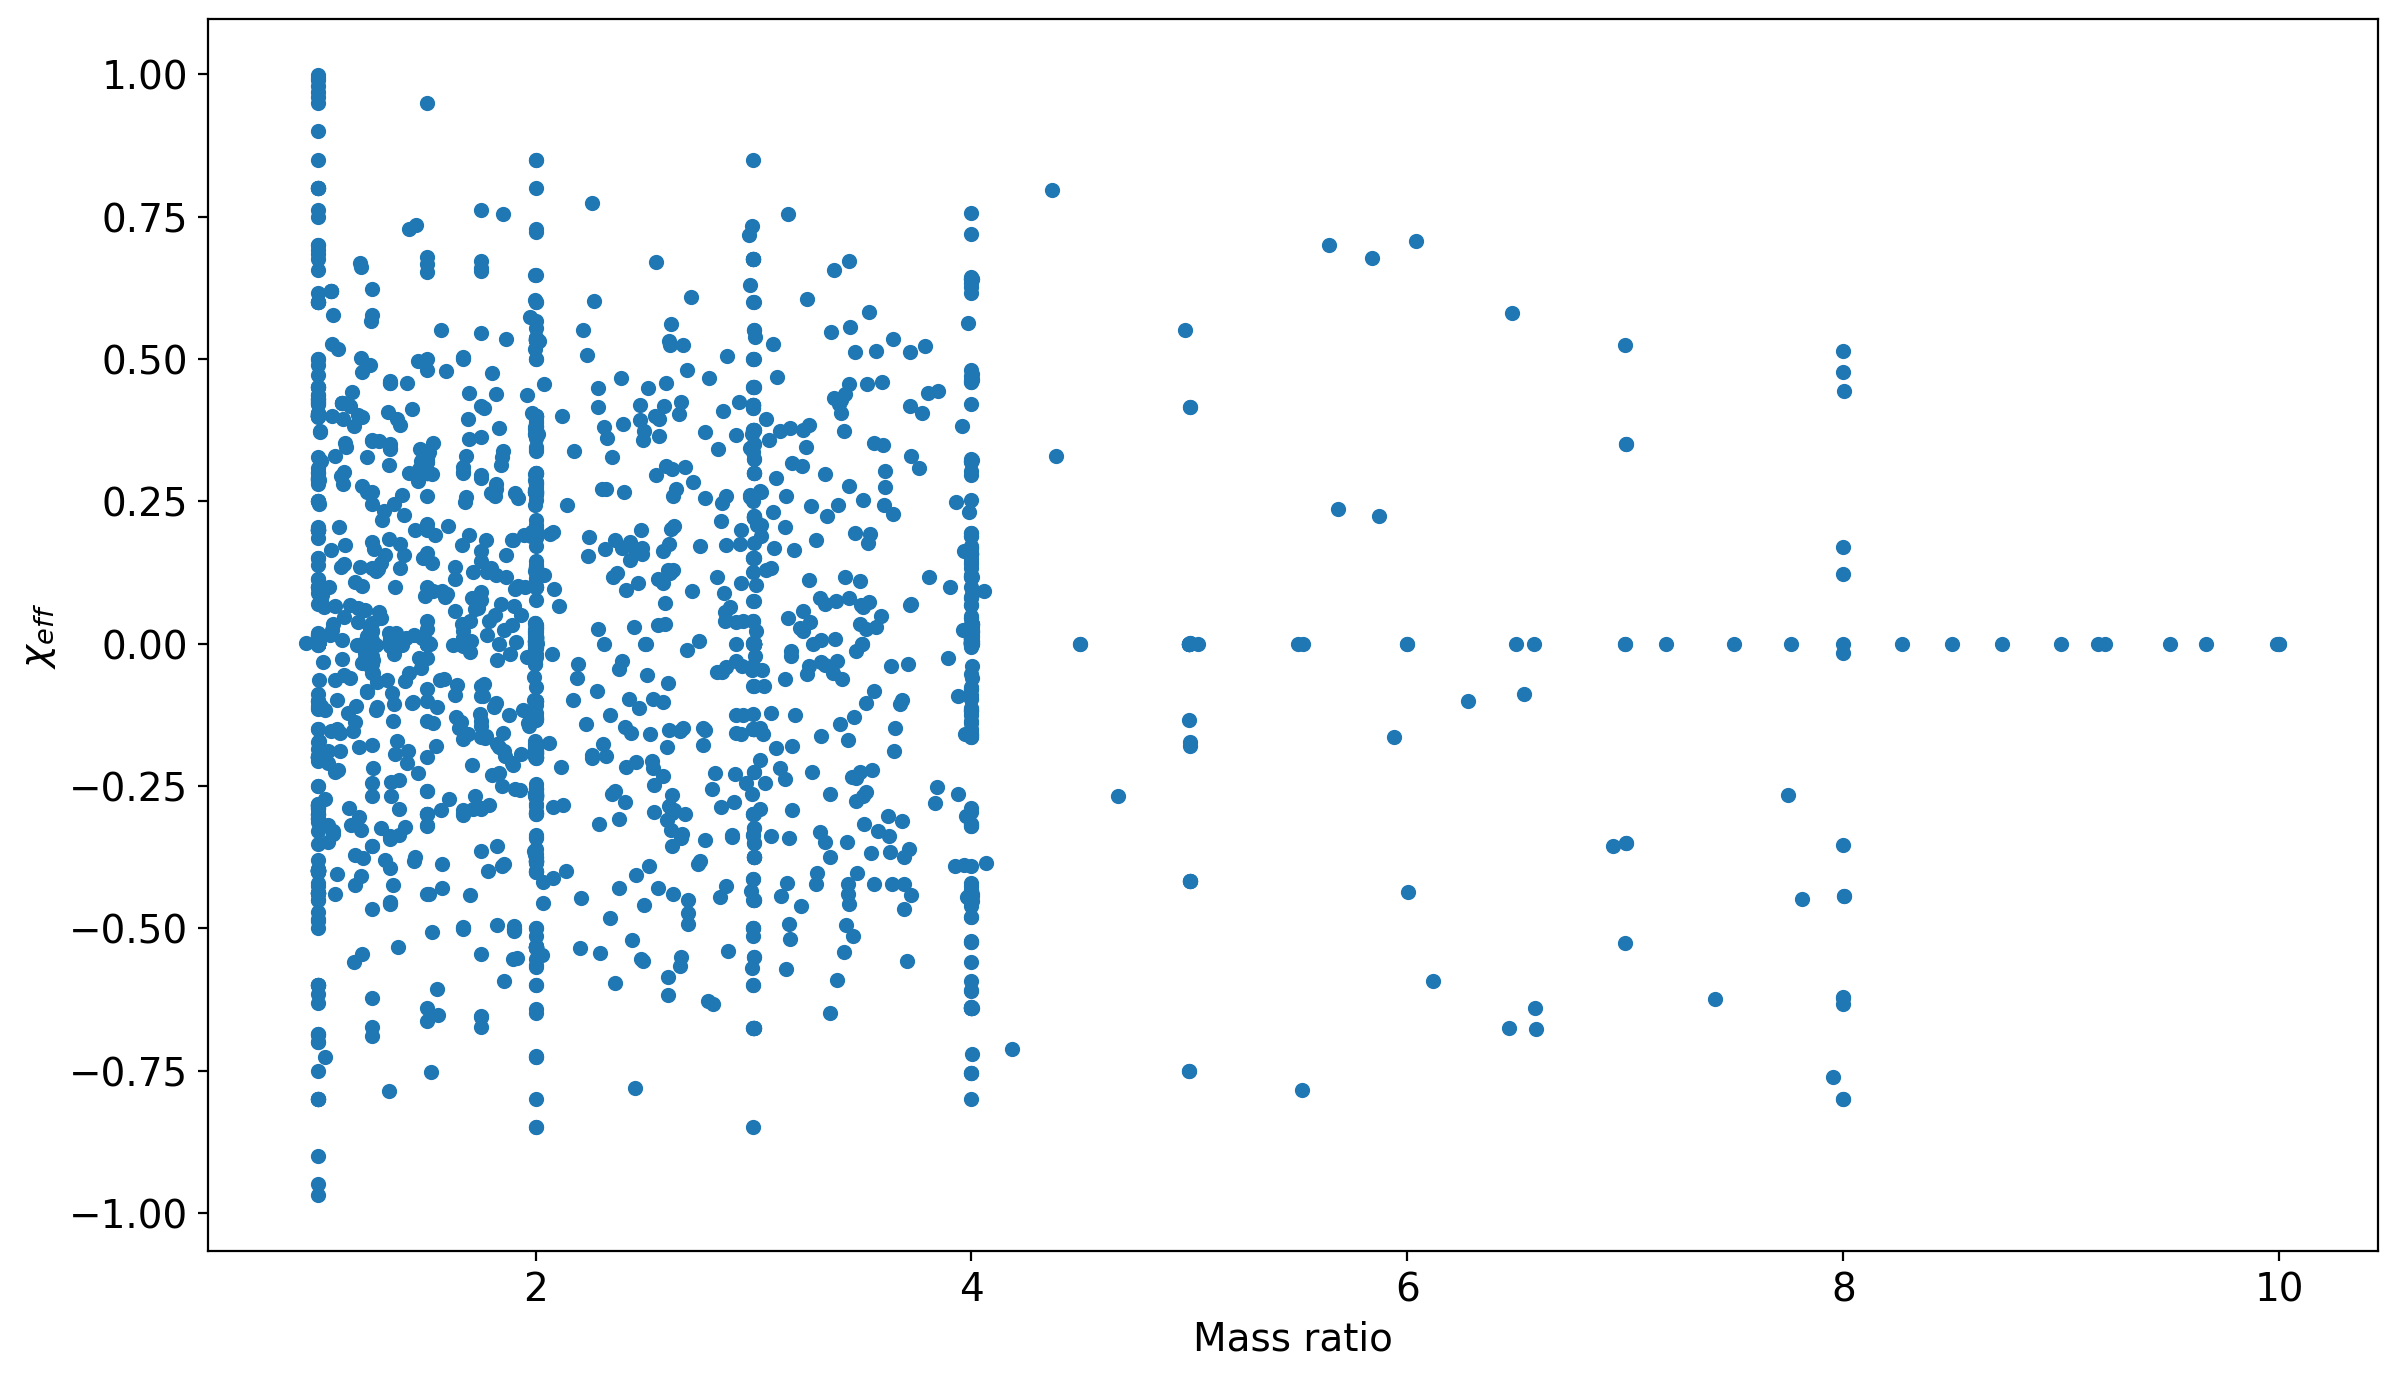

In [65]:
BHBH.plot("reference_mass_ratio", "reference_chi_eff", kind="scatter")

# pandas adds the column labels as axis labels, but we can make them look nicer
plt.xlabel(r"Mass ratio")
plt.ylabel(r"$\chi_{eff}$");

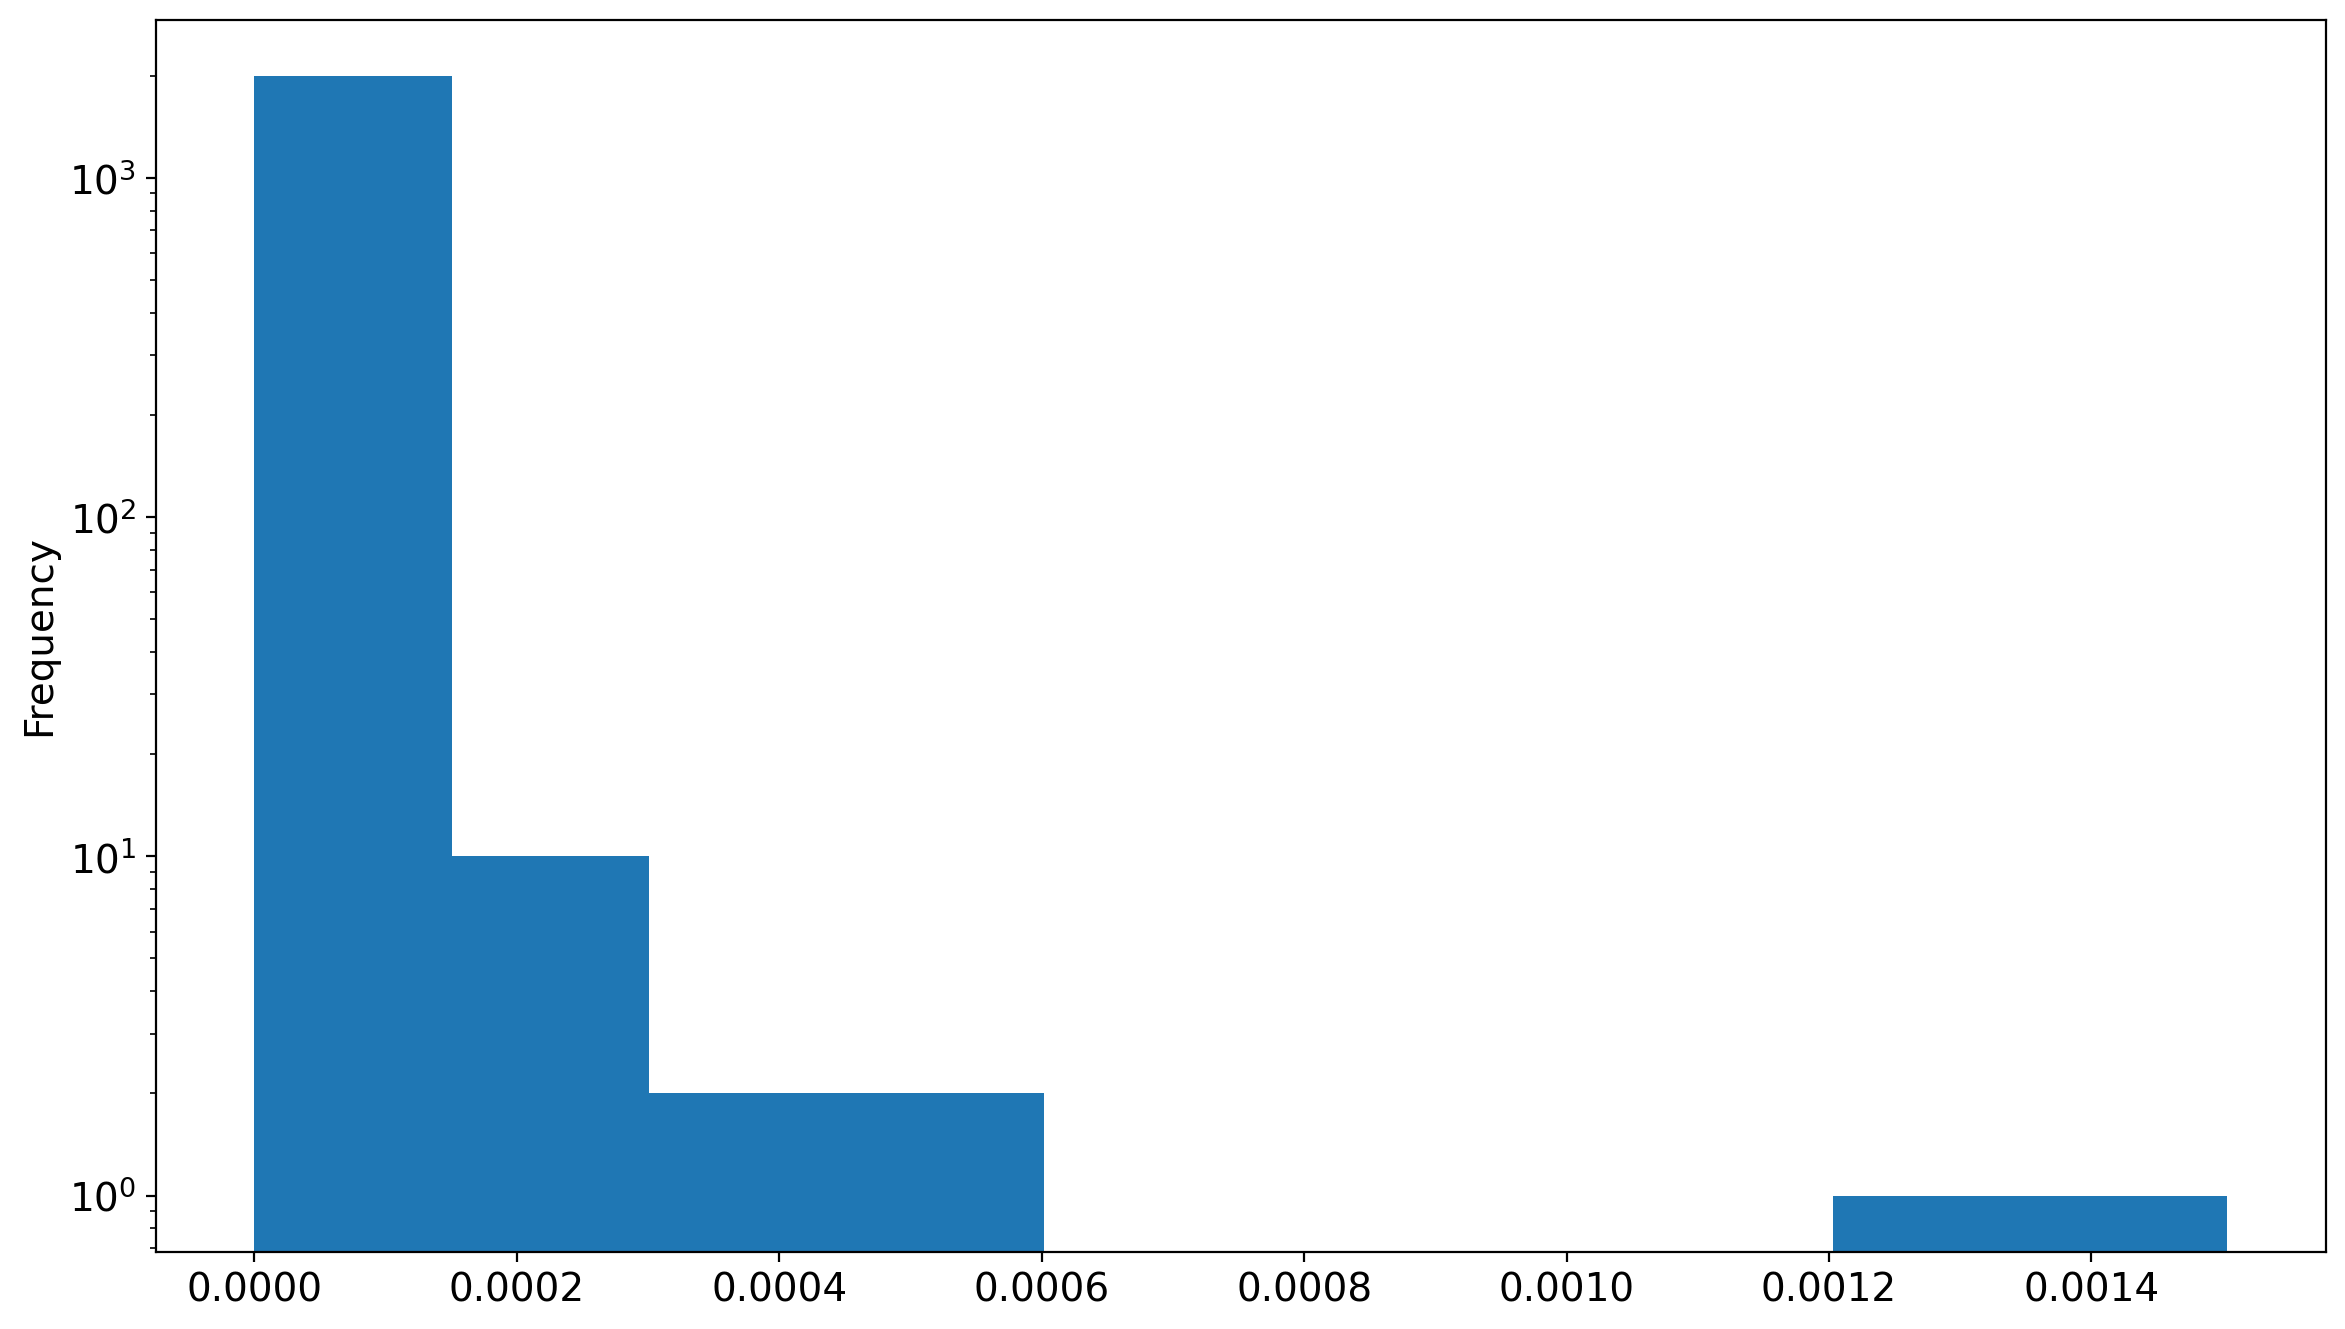

In [83]:
BHBH["com_correction_boost_velocity_mag"].plot.hist(log=True);

We can even make corner plots:

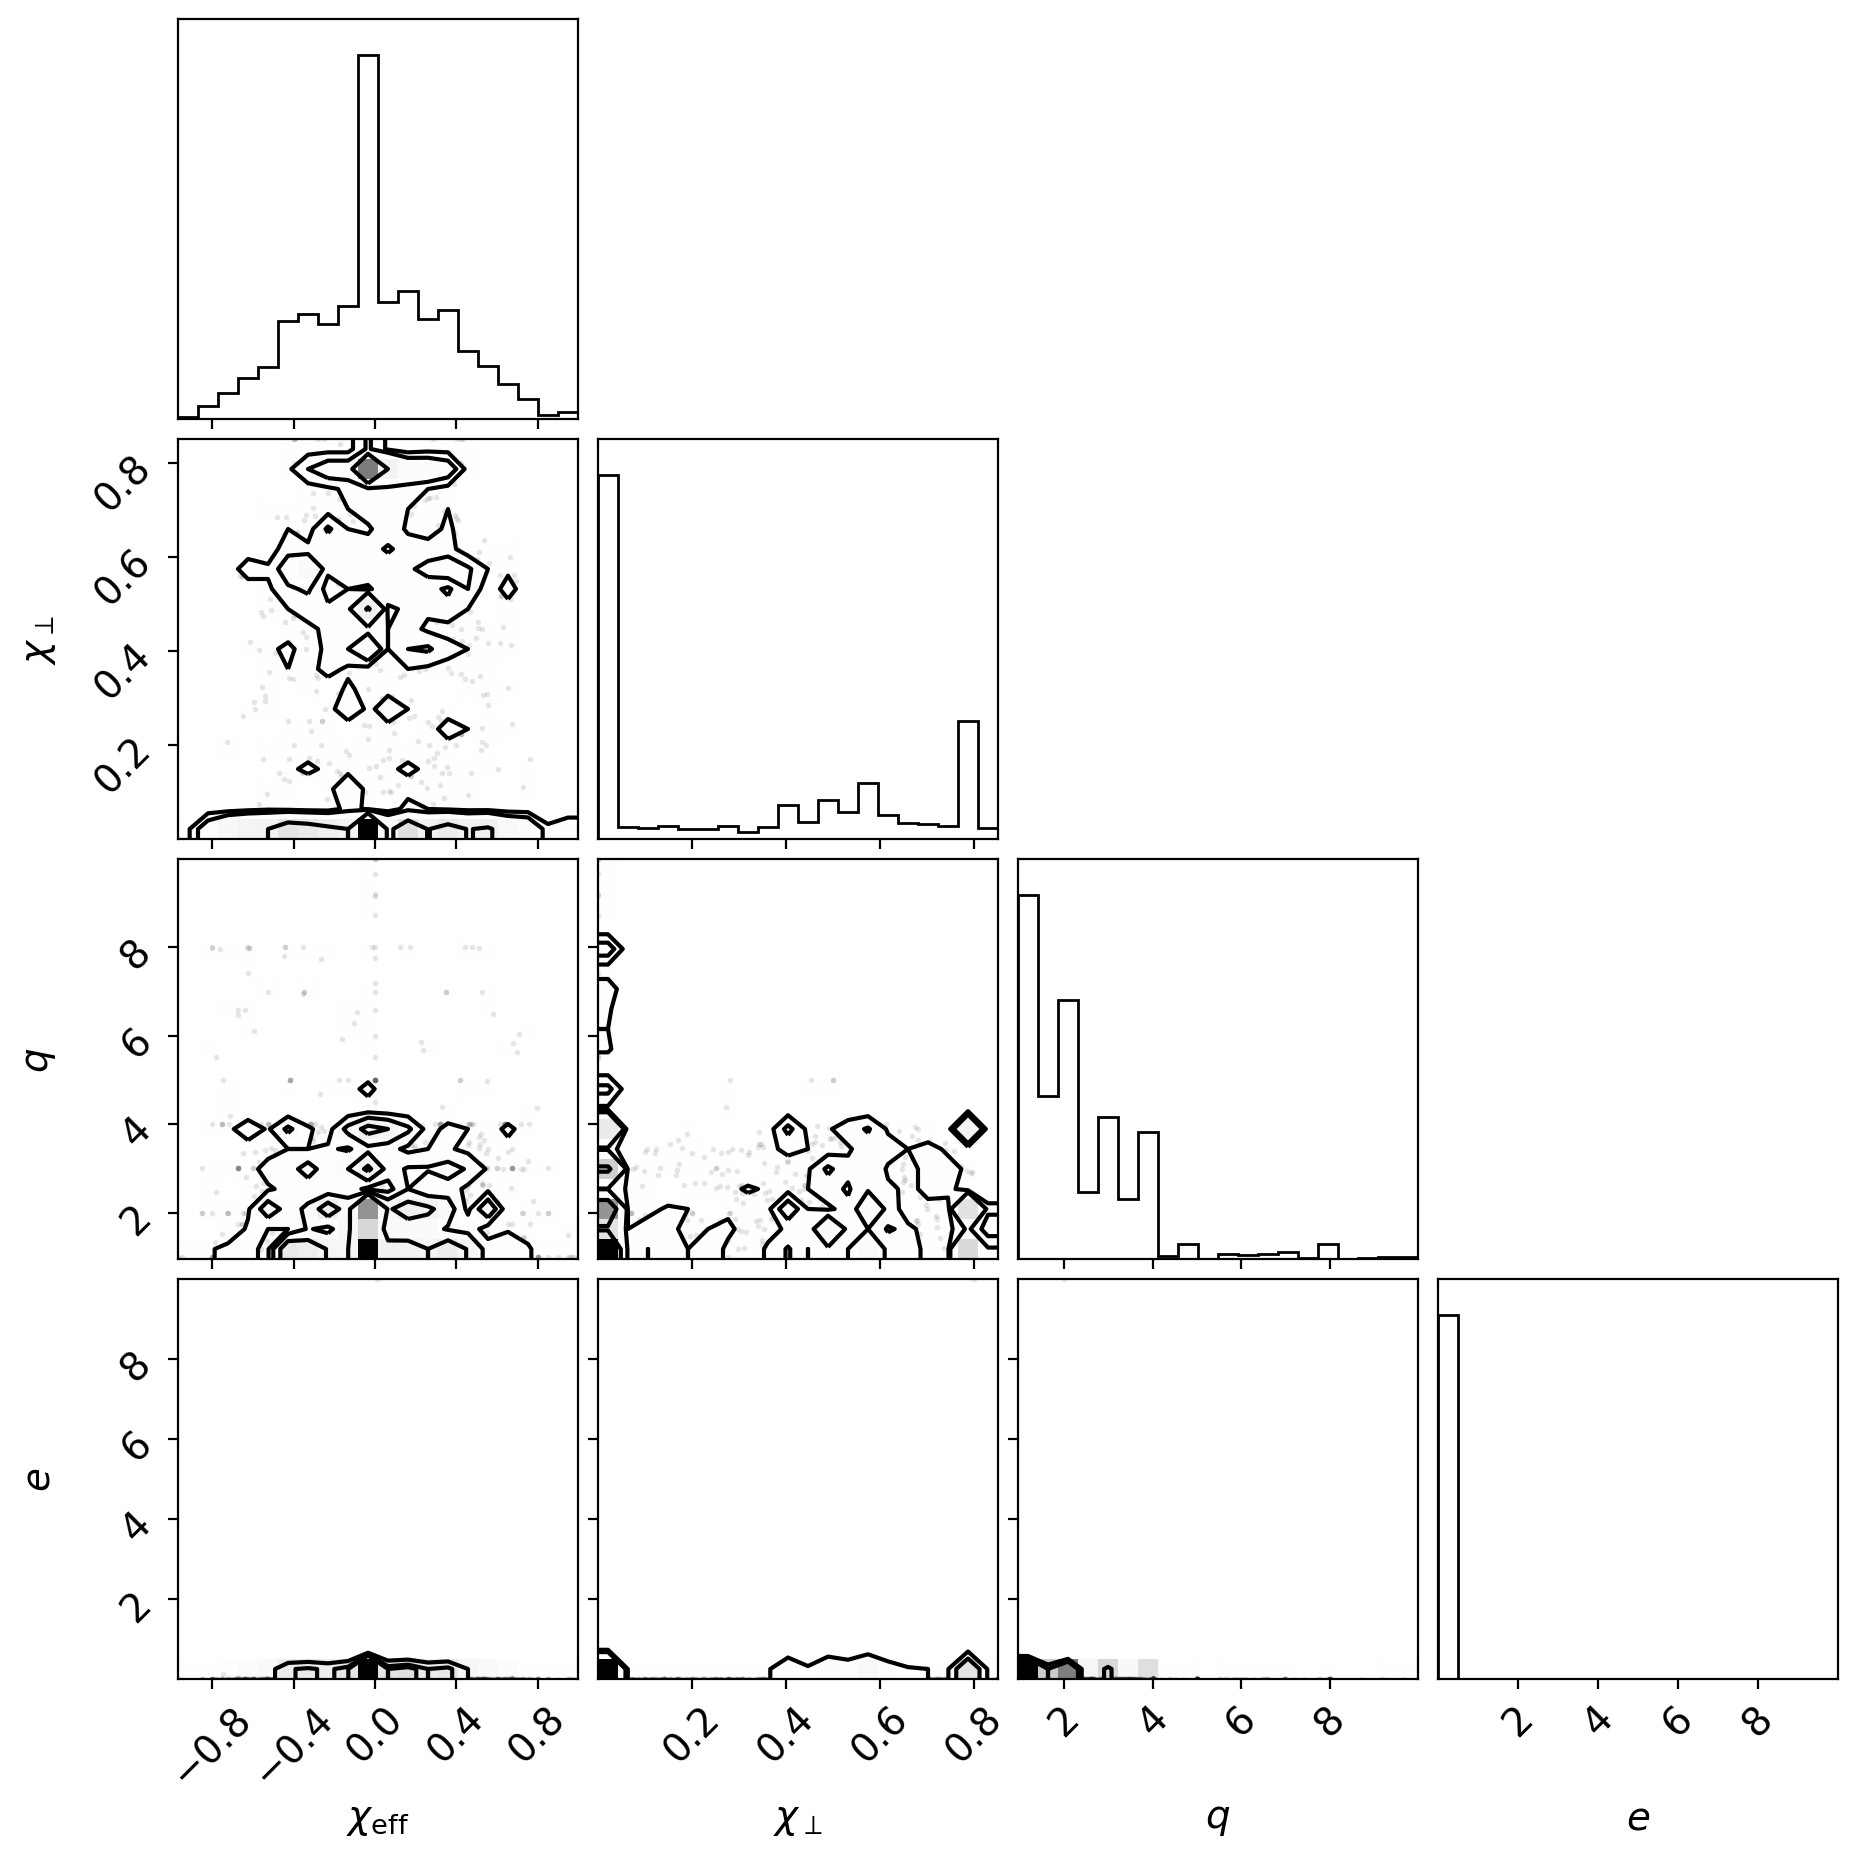

In [89]:
corner.corner(
    BHBH[["reference_chi_eff", "reference_chi1_perp", "reference_mass_ratio", "reference_eccentricity"]].dropna(),
    labels=[r"$\chi_{\mathrm{eff}}$", r"$\chi_{\perp}$", r"$q$", r"$e$"],
    quiet=True
);

# Selecting data sets

Once you have some idea of which simulations you're interested in, you have to actually get some of the data from them.  The `catalog` object has another useful feature to help you with this task: `catalog.select`.  This is a function that takes a string that — at least partially — specifies the simulation and dataset you want to load, and narrows down the list to exactly the file or files you request.  It is used by `sxs.load` to find files to load, and therefore understanding how `select` works is important to understanding how `sxs.load` works.

For example, suppose that `catalog.simulations` has shown you that you want to look at SXS:BBH:0314.  This isn't actually specific enough to get any data.

First, it turns out that there are four different versions of this simulation on Zenodo:

  - SXS:BBH:0314v1
  - SXS:BBH:0314v2

Each of these has at least one file that changed from the previous version.  We only update files when we think we can improve them, so unless you're trying to reproduce results from some old version, you probably want the latest version.  The `select` function will help with this.

Second, we run most simulations at more than one resolution, to check for convergence.  These resolutions are named "Lev" followed by some number.  The number is complicated, but generally speaking: the higher this number is, the better.  In each of the versions above, you will find

  - Lev1
  - Lev2
  - Lev3
  - Lev4

Again, unless you are checking convergence or comparing results with someone who used a lower Lev, you probably just want the highest Lev.  And again, `select` will help with this.

Third, you may not know which file you want, but you don't want to sift through `catalog.records` to find your options.  Here again, `select` will do what you need.

Basically, `select` walks through a path, trying to match the first component (the part up to the first "/"), narrowing the list down with that match, and moving on to the second component, etc.  For each component, there are three options:

  1. An exact match.  For example, you can enter "SXS:BBH:0314v1" to get that version.
  2. A partial match, like "SXS:BBH:0314".  Here, `select` will take every component that matches what you've entered, and take the "largest" one.  In this case, "v2" is the largest, so that's the one you get by default.  Similarly, "Lev4" would be the largest in the list above.
  3. A regex.  If nothing has matched so far, `select` treats your string as a regex and looks for more matches.  This lets you match multiple cases.  For example, `Lev.` would match every Lev, and `Lev(2|4)` would match only Levs 2 and 4 — though again, `Lev` would return only the highest result: Lev4.
  
A few examples may help to clarify:

In [124]:
catalog.select("SXS:BBH:0314/Lev/rhOverM")

['SXS:BBH:0314v2/Lev4/rhOverM_Asymptotic_GeometricUnits_CoM.h5']

In [127]:
catalog.select("SXS:BBH:0314/Lev(2|4)/rhOverM")

['SXS:BBH:0314v2/Lev2/rhOverM_Asymptotic_GeometricUnits_CoM.h5',
 'SXS:BBH:0314v2/Lev4/rhOverM_Asymptotic_GeometricUnits_CoM.h5']

In [126]:
catalog.select("SXS:BBH:0314v./Lev(2|4)/rhOverM")

['SXS:BBH:0314v1/Lev2/rhOverM_Asymptotic_GeometricUnits_CoM.h5',
 'SXS:BBH:0314v1/Lev4/rhOverM_Asymptotic_GeometricUnits_CoM.h5',
 'SXS:BBH:0314v2/Lev2/rhOverM_Asymptotic_GeometricUnits_CoM.h5',
 'SXS:BBH:0314v2/Lev4/rhOverM_Asymptotic_GeometricUnits_CoM.h5']

These same strings could be passed to `sxs.load`, and *each* of the matches would be loaded and returned.